1. There are 246 countries/regions in the dataset.
2. Hong Kong SAR, China has the highest life expectancy in 2018
3. Central African Republic has the lowest life expectancy in 2018
4. Syrian Arab Republichas the greatest absolute difference in life expectancy for the latest data point.
5. The following countries have shown the greatest % increase in total life expectancy:
   Zambia
   Malawi
   Rwanda
   Sierra Leone
   Zimbabwe


<ipython-input-5-603d1474cfc9>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Difference'] = abs(df_2018['Female LE'] - df_2018['Male LE'])
<ipython-input-5-603d1474cfc9>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_2018['Difference'] = df_plot_2018['Female LE'] - df_plot_2018['Male LE']


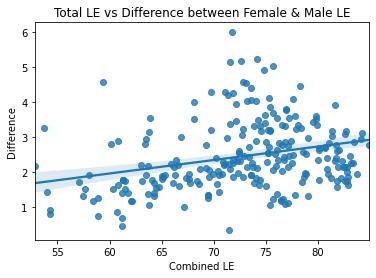

Positive difference indicates that females generally have longer life expectancy than males.
There is a slight positive correlation between difference in life expectancies for females and males and combined life expectancies.
Indicating that higher combined life expectancy is slightly attributable to higher female life expectancy.
Reason why females live longer than males might be due to lifestyle habits such as the fact that males smoke more than females.


<ipython-input-5-603d1474cfc9>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_2000['Difference'] = df_plot_2000['Female LE'] - df_plot_2000['Male LE']


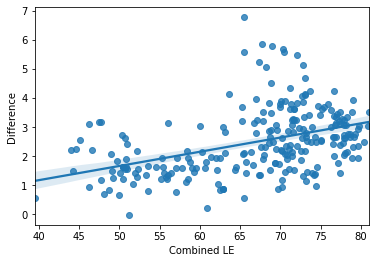

While comparing 2000 and 2018 plots, noted the same positive correlation.
Another point to note is that the combined life expectancies have increased while the difference between females and males have decreased.
This may be due to improved quality of living over the years.


In [5]:
# PART I

# Libraries
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to get all pages of data
def get_combined_page(i):
    url = 'http://api.worldbank.org/v2/country/all/indicator/SP.DYN.LE00.IN?format=json&date=2000:2018&page='+str(i)
    return url

def get_female_page(i):
    url = 'http://api.worldbank.org/v2/country/all/indicator/SP.DYN.LE00.FE.IN?format=json&date=2000:2018&page='+str(i)
    return url

def get_male_page(i):
    url = 'http://api.worldbank.org/v2/country/all/indicator/SP.DYN.LE00.MA.IN?format=json&date=2000:2018&page='+str(i)
    return url

# Identify number of pages of data
result_combined = requests.get('http://api.worldbank.org/v2/country/all/indicator/SP.DYN.LE00.IN?format=json&date=2000:2018')
data_combined = json.loads(result_combined.text)
pages_combined = data_combined[0]["pages"]

result_female = requests.get('http://api.worldbank.org/v2/country/all/indicator/SP.DYN.LE00.FE.IN?format=json&date=2000:2018')
data_female = json.loads(result_female.text)
pages_female = data_female[0]["pages"]

result_male = requests.get('http://api.worldbank.org/v2/country/all/indicator/SP.DYN.LE00.MA.IN?format=json&date=2000:2018')
data_male = json.loads(result_male.text)
pages_male = data_male[0]['pages']

# Extract data from all pages, create dataframe and extract required columns
list_combined = []
for i in range(1, pages_combined+1):
    result_combined = requests.get(get_combined_page(i))
    list_combined.extend(json.loads(result_combined.text)[1])
df_combined = pd.json_normalize(list_combined)
df_combined_x = df_combined[['country.value', 'date', 'value']].copy()
df_combined_x.rename(columns = {'country.value':'Country/Region', 'date':'Year', 'value':'Combined LE'}, inplace = True)

list_female = []
for i in range(1, pages_female+1):
    result_female = requests.get(get_female_page(i))
    list_female.extend(json.loads(result_female.text)[1])
df_female = pd.json_normalize(list_female)
df_female_x = df_female[['country.value', 'date', 'value']].copy()
df_female_x.rename(columns = {'country.value':'Country/Region', 'date':'Year', 'value':'Female LE'}, inplace = True)

list_male = []
for i in range(1, pages_male+1):
    result_male = requests.get(get_combined_page(i))
    list_male.extend(json.loads(result_male.text)[1])
df_male = pd.json_normalize(list_male)
df_male_x = df_male[['country.value', 'date', 'value']].copy()
df_male_x.rename(columns = {'country.value':'Country/Region', 'date':'Year', 'value':'Male LE'}, inplace = True)

# Merge dataframes, filter for countries with >= 10 years of data and convert to csv
df = df_female_x.merge(df_male_x, on = ['Country/Region', 'Year'])\
                                        .merge(df_combined_x, on = ['Country/Region', 'Year'])
df_dropna = df.dropna()
df_groupby=df_dropna.groupby(by=['Country/Region'],as_index=False)['Country/Region'].agg({'rec':'count'})
more_than_10=df_groupby[df_groupby['rec']>=10]
more_than_10_list=np.array(more_than_10['Country/Region']).tolist()
final_df=df_dropna[df_dropna['Country/Region'].isin(more_than_10_list)]
final_df.to_csv("final_df.csv")
final_df.head()

# PART II

# 1.How many countries/regions are in the dataset?
print("1. There are " + str(final_df['Country/Region'].nunique()) + " countries/regions in the dataset.")

# 2.Which country has the highest total life expectancy in 2018? 
df_2018 = final_df[final_df['Year']=="2018"]
print("2. " + df_2018.sort_values('Combined LE',ascending=False).iloc[0][0] + " has the highest life expectancy in 2018")

# 3.Which has the lowest? 
print("3. " + df_2018.sort_values('Combined LE',ascending=True).iloc[0][0] + " has the lowest life expectancy in 2018")

# 4.Which country has the greatest absolute difference in male and female life expectancy, and what is the difference, for the latest data point? 
df_2018['Difference'] = abs(df_2018['Female LE'] - df_2018['Male LE'])
print("4. " + df_2018.sort_values("Difference",ascending=False).iloc[0][0] + "has the greatest absolute difference in life expectancy for the latest data point.")

# 5.Which 5 countries have shown the greatest % increase in total life expectancy, between the earliest and latest data points, and what was the increase for each?
latest = final_df.sort_values('Year').groupby('Country/Region').tail(1)
earliest = final_df.sort_values('Year').groupby('Country/Region').head(1)
combined = latest.merge(earliest, on='Country/Region')
combined['% Increase'] = (combined['Combined LE_x'] - combined['Combined LE_y'])/combined['Combined LE_y']*100
print('5. The following countries have shown the greatest % increase in total life expectancy:')
for i in range(0,5):
    print("   " + combined.sort_values('% Increase', ascending=False).iloc[i][0])

# PART III

df_plot = pd.read_csv("final_df.csv")
df_plot_2018 = df_plot[df_plot["Year"]==2018]
df_plot_2018['Difference'] = df_plot_2018['Female LE'] - df_plot_2018['Male LE']
sns.regplot(x = 'Combined LE', y = 'Difference', data = df_plot_2018).set_title('Total LE vs Difference between Female & Male LE')
plt.show()
print("Positive difference indicates that females generally have longer life expectancy than males.")
print("There is a slight positive correlation between difference in life expectancies for females and males and combined life expectancies.")
print("Indicating that higher combined life expectancy is slightly attributable to higher female life expectancy.")
print("Reason why females live longer than males might be due to lifestyle habits such as the fact that males smoke more than females.")

df_plotx = pd.read_csv("final_df.csv")
df_plot_2000 = df_plotx[df_plotx["Year"]==2000]
df_plot_2000['Difference'] = df_plot_2000['Female LE'] - df_plot_2000['Male LE']
sns.regplot(x = 'Combined LE', y = 'Difference', data = df_plot_2000)
plt.show()
print("While comparing 2000 and 2018 plots, noted the same positive correlation.")
print("Another point to note is that the combined life expectancies have increased while the difference between females and males have decreased.")
print("This may be due to improved quality of living over the years.")
